# Data Exploration & Analysis

## Notebook Workflow
This notebook explores and analyzes the server temperature dataset with all 11 engineered features.

**Execution Order:**
1. **Cell 1**: Load raw data and apply cleaning/feature engineering
2. **Cell 2**: Verify data quality (no missing values)
3. **Cell 3**: Save cleaned dataset
4. **Cell 4**: Generate correlation heatmap (can run independently - loads from CSV)

**Important**: Run cells in order (1 → 2 → 3 → 4) for best results.

In [6]:
# ============================================================
# CELL 1: Load Raw Data & Apply Feature Engineering
# ============================================================
# This cell loads the raw dataset and applies cleaning + feature 
# engineering using the data_preprocessing module

import pandas as pd
import sys
sys.path.append('../src')
from data_preprocessing import clean_data

# Load raw data from CSV
df_raw: pd.DataFrame = pd.read_csv('../data/server_temperature_data.csv')
print("Raw Data Shape:", df_raw.shape)
print("\nRaw Data Columns:", df_raw.columns.tolist())
print("\nMissing Values in Raw Data:")
print(df_raw.isnull().sum())

# Apply cleaning and feature engineering
df: pd.DataFrame = clean_data(df_raw)
print(f"\nCleaned Data Shape: {df.shape}")
print(f"Features after cleaning: {df.columns.tolist()}")

Raw Data Shape: (28407, 9)

Raw Data Columns: ['Timestamp', 'CPU_Usage', 'CPU_Frequency', 'Memory_Usage', 'Disk_Usage', 'Process_Count', 'Thread_Count', 'CPU_Temperature', 'GPU_Temperature']

Missing Values in Raw Data:
Timestamp            0
CPU_Usage            0
CPU_Frequency        0
Memory_Usage         0
Disk_Usage           0
Process_Count        0
Thread_Count         0
CPU_Temperature    327
GPU_Temperature    320
dtype: int64

Cleaned Data Shape: (28079, 13)
Features after cleaning: ['Timestamp', 'CPU_Usage', 'CPU_Frequency', 'Memory_Usage', 'Disk_Usage', 'Process_Count', 'Thread_Count', 'CPU_Temperature', 'GPU_Temperature', 'Ambient_Temperature', 'Voltage', 'Current_Load', 'Prev_CPU_Temperature']


In [7]:
# ============================================================
# CELL 2: Verify Data Quality
# ============================================================
# This cell confirms there are no missing values and shows summary

# (Requires: Cell 1 - df must be defined)

print("Missing values after cleaning:")
print(df.isnull().sum())

print("\n" + "="*50)
print("DATA QUALITY SUMMARY")
print("="*50)
print(f"Total rows: {len(df)}")
print(f"Total features: {len(df.columns)}")
print(f"\nFeature List:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

Missing values after cleaning:
Timestamp               0
CPU_Usage               0
CPU_Frequency           0
Memory_Usage            0
Disk_Usage              0
Process_Count           0
Thread_Count            0
CPU_Temperature         0
GPU_Temperature         0
Ambient_Temperature     0
Voltage                 0
Current_Load            0
Prev_CPU_Temperature    0
dtype: int64

DATA QUALITY SUMMARY
Total rows: 28079
Total features: 13

Feature List:
  1. Timestamp
  2. CPU_Usage
  3. CPU_Frequency
  4. Memory_Usage
  5. Disk_Usage
  6. Process_Count
  7. Thread_Count
  8. CPU_Temperature
  9. GPU_Temperature
  10. Ambient_Temperature
  11. Voltage
  12. Current_Load
  13. Prev_CPU_Temperature


In [8]:
# ============================================================
# CELL 3: Save Cleaned Dataset
# ============================================================
# This cell exports the cleaned data with all 11 features to CSV

# (Requires: Cell 1 - df must be defined)

# Save the final cleaned version with all 11 features
df.to_csv('../data/cleaned_server_data.csv', index=False)
print(f"✓ SUCCESS: Cleaned data saved as 'cleaned_server_data.csv'!")
print(f"  Rows: {len(df)} | Columns: {len(df.columns)}")

✓ SUCCESS: Cleaned data saved as 'cleaned_server_data.csv'!
  Rows: 28079 | Columns: 13


Feature Correlation with CPU_Temperature (sorted by strength):
  Prev_CPU_Temperature     :  0.9523
  GPU_Temperature          :  0.8549
  Current_Load             :  0.8419
  CPU_Usage                :  0.8419
  Memory_Usage             :  0.7774
  Process_Count            :  0.4551
  Disk_Usage               :  0.3465
  Thread_Count             :  0.3368
  Ambient_Temperature      :  0.1824
  CPU_Frequency            :     nan
  Voltage                  :     nan


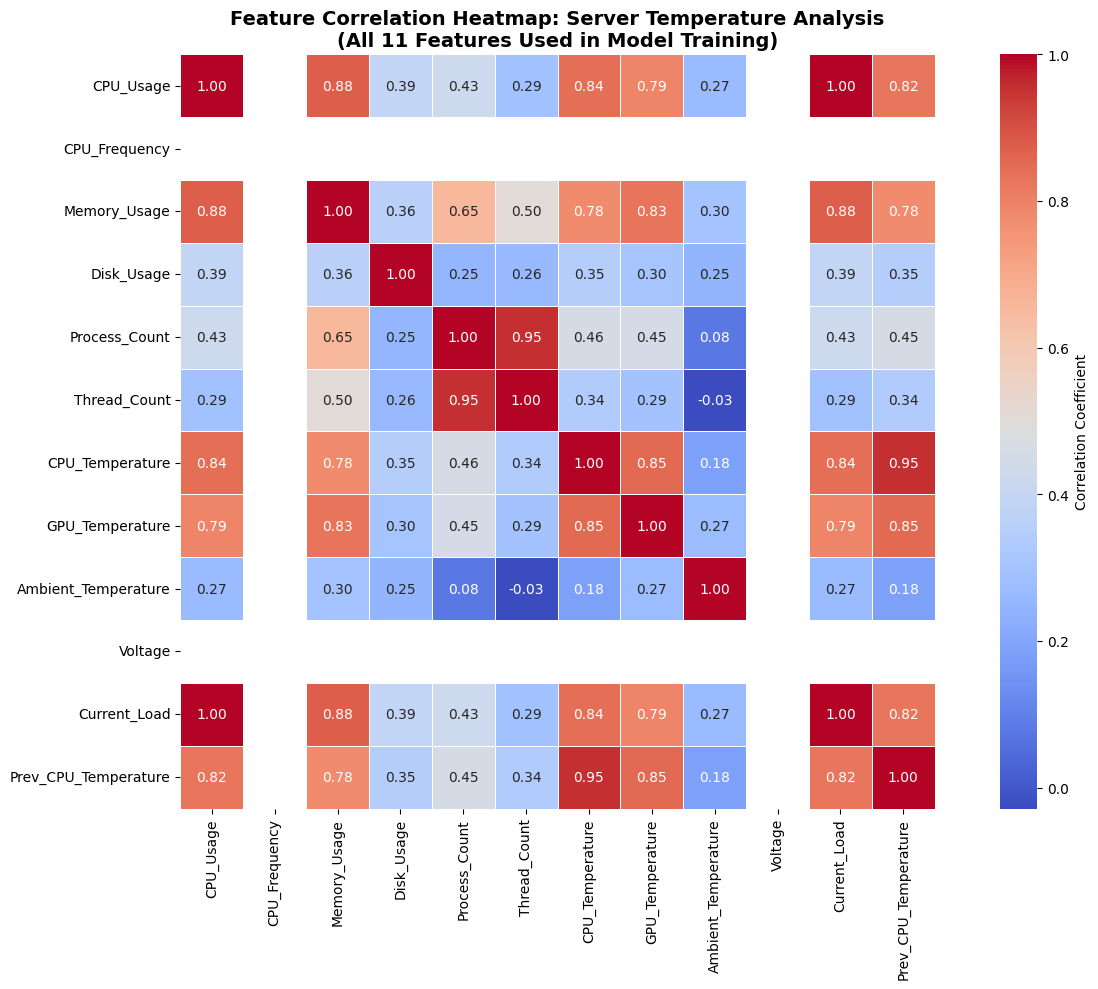


Heatmap matches the 11 features used in train_model.py:
✓ All synthetic features included (Ambient_Temperature, Voltage, etc.)
✓ Heatmap visualization is now consistent with model training data


In [9]:
# ============================================================
# CELL 4: Generate Feature Correlation Heatmap
# ============================================================
# This cell creates a comprehensive correlation heatmap showing
# relationships between all 11 features and the target variable.
# 
# NOTE: This cell is SELF-CONTAINED - it loads data from CSV
# and does NOT require Cells 1-3 to be run first.
# (However, the CSV must exist - so run Cell 3 first)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data with all 11 features from CSV
df_loaded: pd.DataFrame = pd.read_csv('../data/cleaned_server_data.csv')

# Drop Timestamp (non-numeric) and calculate correlation for numeric features only
df_numeric: pd.DataFrame = df_loaded.drop('Timestamp', axis=1)
correlation_matrix: pd.DataFrame = df_numeric.corr()

print("Feature Correlation with CPU_Temperature (sorted by strength):")
print("="*60)
cpu_temp_corr = correlation_matrix['CPU_Temperature'].sort_values(ascending=False)
for feature, corr_value in cpu_temp_corr.items():
    if feature != 'CPU_Temperature':
        print(f"  {feature:25s}: {corr_value:7.4f}")

# Create comprehensive heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            cbar_kws={'label': 'Correlation Coefficient'}, 
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap: Server Temperature Analysis\n(All 11 Features Used in Model Training)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("Heatmap matches the 11 features used in train_model.py:")
print("="*60)
print("✓ All synthetic features included (Ambient_Temperature, Voltage, etc.)")
print("✓ Heatmap visualization is now consistent with model training data")